# Gauss Filter

El filtro gaussiano suaviza la imagen y reduce el ruido al aplicar una función gaussiana a cada píxel de la imagen, lo que tiene el efecto de suavizar los bordes y reducir los detalles finos.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt



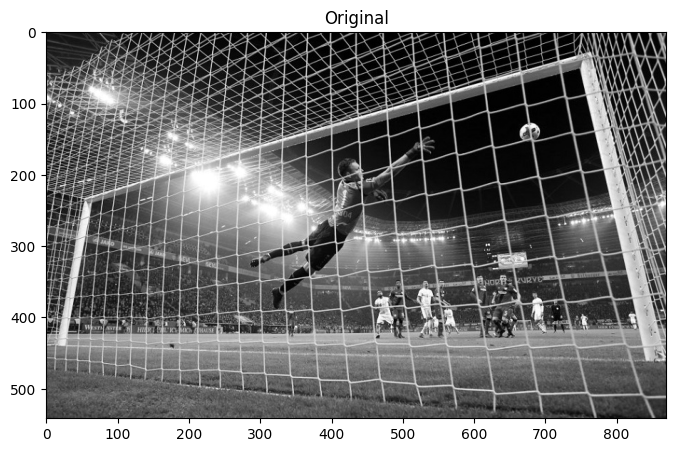

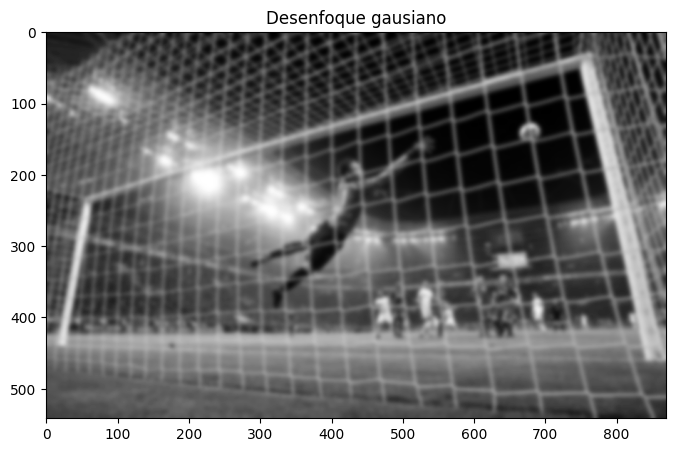

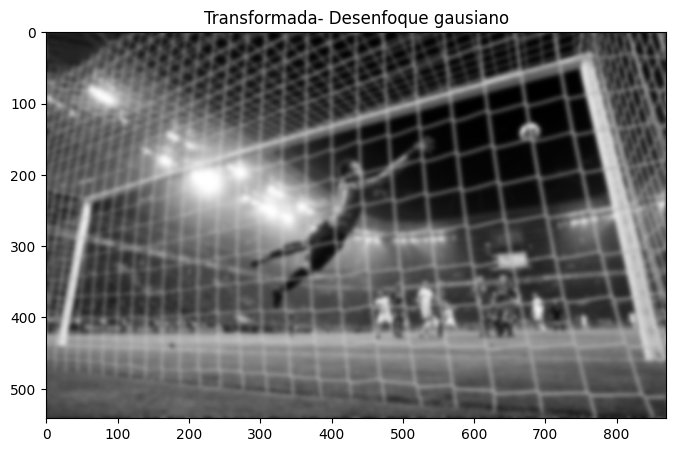

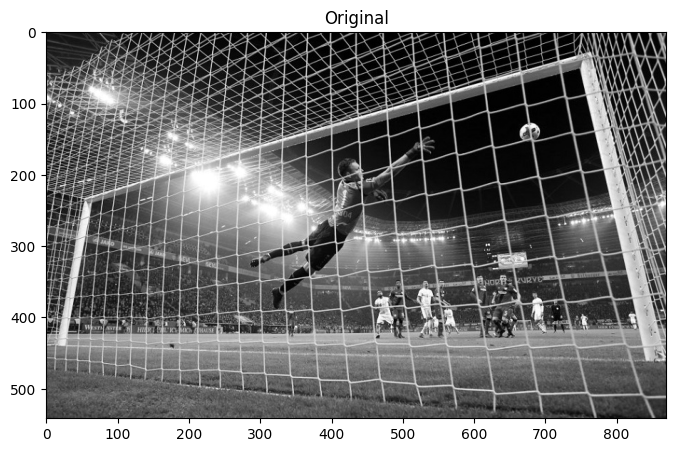

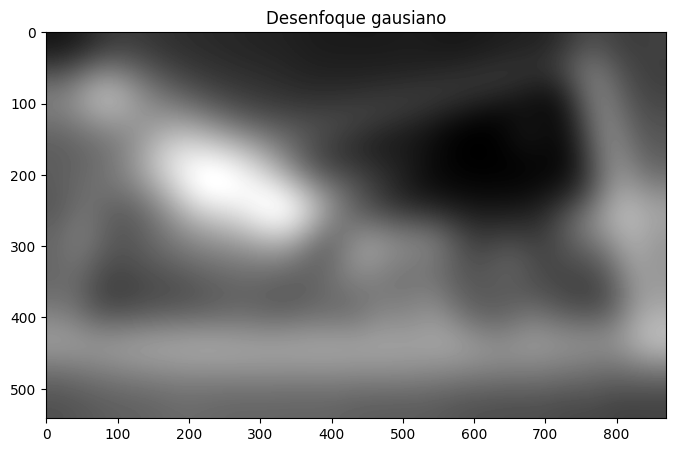

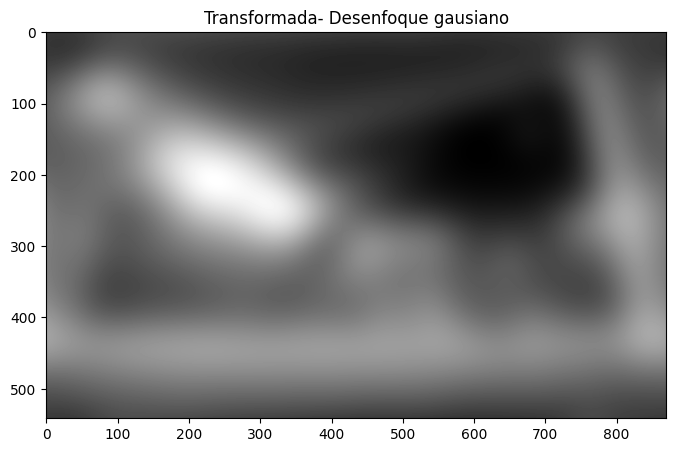

In [32]:
img = cv.imread('golazo.jpg', cv.IMREAD_GRAYSCALE)

def create_gauss_filter(h, w, k_size, sigma):        
    # El tamaño del filtro tiene que ser igual que toda la imagen para poder filtrarla.
    y, x = np.indices((h, w))
    x = x - int(w / 2)
    
    y = y - int(h / 2)
    
    gauss = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
  
    # normalizar todos los valores 
    gauss = gauss / np.sum(gauss)
    

    # ajustar el tamaño del kernel al tamaño de la imagen
    # El tamaño del kernel, tiene que entrar en la imagen
    pad_h = np.maximum((k_size-gauss.shape[0]) // 2, 0)
    pad_w = np.maximum((k_size-gauss.shape[1]) // 2, 0)
    

    gauss = np.pad(gauss, [(pad_h, pad_h), (pad_w, pad_w)], mode='constant')

    # calcular la transformada de Fourier del kernel
    gauss_tf = np.fft.fft2(gauss)

    return gauss, gauss_tf



def apply_gauss_gilter(img, k_size, sigma):
    gaussian , g_fft=create_gauss_filter(img.shape[0], img.shape[1], k_size, sigma)
    img_fft = np.fft.fft2(img)
    filtered = img_fft * g_fft
    img_gauss_t = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
    img_gauss= cv.filter2D(img, -1, gaussian)
    return img_gauss,img_gauss_t

def plot_img(img,metodo):
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap='gray')
    plt.title(metodo)
 
k_size=1
sigma=3
kernel, kernel_tf = create_gauss_filter(img.shape[0], img.shape[1],k_size,sigma)
img_gauss,img_gauss_t=apply_gauss_gilter(img,k_size,sigma)
plot_img(img,"Original")
plot_img(img_gauss,"Desenfoque gausiano")
plot_img(img_gauss_t,"Transformada- Desenfoque gausiano")

k_size=500
sigma=30
kernel, kernel_tf = create_gauss_filter(img.shape[0], img.shape[1],k_size,sigma)
img_gauss,img_gauss_t=apply_gauss_gilter(img,k_size,sigma)
plot_img(img,"Original")
plot_img(img_gauss,"Desenfoque gausiano")
plot_img(img_gauss_t,"Transformada- Desenfoque gausiano")


Punto 2

In [ ]:
import numpy as np

def image_quality_measure(image):
    # Step 1: Compute F which is the Fourier Transform representation of image
    f = np.fft.fft2(image)
    
    # Step 2: Find Fc which is obtained by shifting the origin of F to centre.
    fc = np.fft.fftshift(f)
    
    # Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I.
    af = np.abs(fc)
    
    # Step 4: Calculate M = max (AF) where M is the maximum value of the frequency component in F.
    max = np.max(af)
    
    # Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000.
    th = max / 1000
    rows, cols = image.shape
    total_pixels = rows * cols
    high_frequency_pixels = np.sum(af > th)
    # Step 6: Calculate Image Quality measure (FM) 
    fm = high_frequency_pixels / total_pixels
    return fm

img = cv.imread('golazo.jpg', cv.IMREAD_GRAYSCALE)
kernel, kernel_tf = create_gauss_filter(*img.shape, 5, 3)
img_gauss,img_gauss_t=apply_gauss_gilter(img,5,3)

fm = image_quality_measure(img)
print('Quality measure:', fm)
fm = image_quality_measure(img_gauss)
print('Quality measure:', fm)
fm = image_quality_measure(img_gauss_t)
print('Quality measure:', fm)


Gradient Energy:
El algoritmo Gradient Energy es un método para realzar los bordes en una imagen al resaltar los píxeles que tienen un cambio significativo en la intensidad en comparación con sus vecinos. La idea detrás del algoritmo es calcular la energía de los gradientes de la imagen, es decir, la suma de los valores absolutos de las diferencias de intensidad entre los píxeles adyacentes en la dirección horizontal y vertical. Esta energía de gradiente se puede usar para realzar los bordes en la imagen, ya que los bordes tendrán gradientes más altos.

In [ ]:

img = cv.imread('golazo.jpg', cv.IMREAD_GRAYSCALE)
# Calcular los gradientes en las direcciones horizontal y vertical utilizando el operador Sobel
gx = cv.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
gy = cv.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
# Calcular la energía de gradiente sumando los valores absolutos de los gradientes horizontal y vertical en cada píxel.
grad_energy = np.sqrt(np.square(gx) + np.square(gy))
# Normalizo
grad_energy = cv.normalize(grad_energy, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)
# Aplicar un umbral a la energía de gradiente
threshold = 50
binary = cv.threshold(grad_energy, threshold, 255, cv.THRESH_BINARY)[1]
# Aplico la mascara binaria
filtered_image = cv.bitwise_and(img, binary)

fm = image_quality_measure(filtered_image)
print('Quality measure:', fm)


Apendice:
Contiene calculos e iteraciones para llegar a los resultados del Tp

In [ ]:
# Suavizado Gaussiano usando el Kernel
#=====================================
img_orig = cv.imread('golazo.jpg')
# Creamos un núcleo Gaussiano unidimensional

kX = cv.getGaussianKernel(ksize=17, sigma=5)
kY = cv.getGaussianKernel(ksize=17, sigma=5)
# Aplicamos el filtro Gaussiano. Con distinto núcleo para X e Y!

result_a = cv.sepFilter2D(img_orig,  ddepth=-1, kernelX=kX, kernelY=kY)
result_b = cv.GaussianBlur(img_orig, ksize=(17, 17), sigmaX=5)
# Mostramos la imagen

out1 = cv.hconcat([img_orig, result_a])
out2 = cv.hconcat([img_orig, result_b])
imgRGB = cv.cvtColor(out1, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()
imgRGB = cv.cvtColor(out2, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

Intento escribirlo en base a una funcion numpy para enteder como se ejecuta

In [ ]:
# Definir tamaño del kernel y sigma
img = cv.imread('golazo.jpg')
# Definir tamaño del kernel y sigma
k_size = 17
sigma = 5
kernel = cv.getGaussianKernel(k_size, sigma)
gaussian_filter = np.multiply(kernel, kernel.T)

# Aplicar filtro gaussiano a la imagen de entrada
result_a = cv.filter2D(img, -1, gaussian_filter)

def get_gaussian_kernel(k_size, sigma):
    center = k_size // 2
    x = np.arange(k_size) - center
    kernel = np.exp(-x**2 / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel.reshape(1, -1)  # retorna un kernel de una sola fila

img = cv.imread('golazo.jpg')
kernel = get_gaussian_kernel(k_size, sigma)
result_b = cv.filter2D(img, -1, kernel)


out1 = cv.hconcat([img_orig, result_a])
out2 = cv.hconcat([img_orig, result_b])
imgRGB = cv.cvtColor(out1, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()
imgRGB = cv.cvtColor(out2, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()


In [ ]:
# Aplico la transformada a la imagen original y a la imagen filtrada por gauss

def fft2_mod(image):
  shifted_image_fft = np.fft.fftshift(np.fft.fft2(image))
  return 20*np.log(np.abs(shifted_image_fft))
# leo la imagen en escala de grises
img = cv.imread('golazo.jpg', cv.IMREAD_GRAYSCALE)

img2=cv.cvtColor(result_b, cv.COLOR_BGR2GRAY)
# obtengo el modulo de la transformada de fourier
mod = fft2_mod(img)
mod2 = fft2_mod(img2)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(2,2,2)
plt.axis('off')
plt.imshow(mod, cmap='jet')
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2, cmap='gray')
plt.subplot(2,2,4)
plt.axis('off')
plt.imshow(mod2, cmap='jet')

Practico con filtro espaciales

In [ ]:
def _filter_round_shape(height, width, radius):
  canvas = np.zeros((height, width))
  return cv.circle(canvas,
                     center=(int(canvas.shape[1]/2), int(canvas.shape[0]/2)),
                     radius=radius,
                     color=(255),
                     thickness=-1).astype(np.uint8)
def create_lp_filter(height, width, radius=20):

  lp_filter = _filter_round_shape(height, width, radius)
  return lp_filter
def create_hp_filter(height, width, radius=60):

  lp_filter = _filter_round_shape(height, width, radius)
  return cv.bitwise_not(lp_filter)

h, w = img.shape
lp_filter = create_lp_filter(h, w, radius=40)
hp_filter = create_hp_filter(h, w, radius=20)
# vuelvo a calcular la FFT. Para aplicar el filtro 
# necesito la transformada en modulo y fase en el dominio
# de los numeros complejos
shifted_fft = np.fft.fftshift(np.fft.fft2(img))
lp_filtered = shifted_fft * lp_filter
hp_filtered = shifted_fft * hp_filter

# Aplicamos la antitransformada y obtenemos las imagenes filtradas
f_ishift = np.fft.ifftshift(lp_filtered)
img_lp = np.real(np.fft.ifft2(f_ishift))
f_ishift = np.fft.ifftshift(hp_filtered)
img_hp = np.real(np.fft.ifft2(f_ishift))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img_lp, cmap='gray')
plt.title('Pasa bajos - Blur o desenfoque')
plt.subplot(1,2,2)
plt.title('Pasa altos - Realce de bordes')
plt.imshow(img_hp, cmap='gray')

Creo las funcion de la consigna 1 y agrego una funcion apply_filters para aplicarlos y graficarlos a una imagen

In [ ]:

def create_lp_filter(height, width, radius=20):

  lp_filter = _filter_round_shape(height, width, radius)
  return lp_filter


def create_hp_filter(height, width, radius=60):

  lp_filter = _filter_round_shape(height, width, radius)
  return cv.bitwise_not(lp_filter)

def create_gauss_filter(h, w, k_size, sigma):
    # Crear una matriz de coordenadas de fila y columna
    y, x = np.indices((h, w))
    lp_filter = create_lp_filter(h, w, radius=40)
    hp_filter = create_hp_filter(h, w, radius=20)
    # Centrar las coordenadas para que el origen esté en el centro de la imagen
    x = x - (w//2)
    y = y - (h//2)
    
    # Calcular la función gaussiana en el dominio espacial
    gaussian = np.exp(-(x**2 + y**2) / (2*sigma**2))
    
    # Normalizar el filtro para que la suma sea 1
    gaussian = gaussian / np.sum(gaussian)

    padx = (w- k_size) // 2
    pady = (h- k_size) // 2
    gaussian_filter = np.pad(gaussian, ((pady, pady), (padx, padx)),'constant')
    
    # Calcular la transformada de Fourier del filtro gaussiano en el dominio espacial
    g_fft =np.fft.fft2(gaussian_filter)

    
    # Devolver el filtro gaussiano en el dominio espacial y su transformada de Fourier
    return gaussian_filter , g_fft,lp_filter,hp_filter
def apply_filters(img,gaussian_filter,lp_filter,hp_filter):
    result_a = cv.filter2D(img, -1, gaussian_filter)
    out1 = cv.hconcat([img, result_a])
    imgRGB = cv.cvtColor(out1, cv.COLOR_BGR2RGB)
    plt.imshow(imgRGB)
    plt.title('Filtro Gaussiano'), plt.xticks([]), plt.yticks([])
    plt.show()
    # Aplicar la Transformada de Fourier a la imagen filtrada
    f = np.fft.fft2(result_a)
    fshift = np.fft.fftshift(f)
    # Obtener el espectro de amplitud de la imagen filtrada en el dominio de la frecuencia
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.imshow(magnitude_spectrum, cmap='jet')
    plt.title('Transformada'), plt.xticks([]), plt.yticks([])
    plt.show()
    shifted_fft = np.fft.fftshift(np.fft.fft2(result_a))
    lp_filtered = shifted_fft * lp_filter
    hp_filtered = shifted_fft * hp_filter
    # Aplicamos la antitransformada y obtenemos las imagenes filtradas
    f_ishift = np.fft.ifftshift(lp_filtered)
    img_lp = np.real(np.fft.ifft2(f_ishift))
    plt.imshow(img_lp, cmap='gray')
    plt.title('Pasa Bajos'), plt.xticks([]), plt.yticks([])
    plt.show()    
    
    f_ishift = np.fft.ifftshift(hp_filtered)
    img_hp = np.real(np.fft.ifft2(f_ishift))
    plt.title('Pasa Altos'), plt.xticks([]), plt.yticks([])
    plt.imshow(img_hp, cmap='gray')
    plt.show()
    return result_a,img_lp,img_hp
# Apply filter in frequency domain

img = cv.imread('golazo.jpg', cv.IMREAD_GRAYSCALE)
h, w = img.shape
k_size = 17
sigma = 5
gaussian_filter , g_fft,lp_filter,hp_filter=create_gauss_filter(h,w,k_size,sigma)
apply_filters(img,gaussian_filter,lp_filter,hp_filter)

img = cv.imread('golazo.jpg', cv.IMREAD_GRAYSCALE)
h, w = img.shape
k_size = 100
sigma = 2
gaussian_filter , g_fft,lp_filter,hp_filter=create_gauss_filter(h,w,k_size,sigma)
result_g,result_lp,result_hp=apply_filters(img,gaussian_filter,lp_filter,hp_filter)



In [ ]:
import numpy as np
import cv2

def image_quality_measure(image):
    # Step 1: Compute F which is the Fourier Transform representation of image
    f = np.fft.fft2(image)
    
    # Step 2: Find Fc which is obtained by shifting the origin of F to centre.
    fc = np.fft.fftshift(f)
    
    # Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I.
    af = np.abs(fc)
    
    # Step 4: Calculate M = max (AF) where M is the maximum value of the frequency component in F.
    max = np.max(af)
    
    # Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000.
    th = max / 1000
    rows, cols = image.shape
    total_pixels = rows * cols
    high_frequency_pixels = np.sum(af > th)
    # Step 6: Calculate Image Quality measure (FM) 
    fm = high_frequency_pixels / total_pixels
    return fm

img = img
fm = image_quality_measure(img)
print('Quality measure:', fm)

img = result_g
fm = image_quality_measure(img)
print('Quality measure:', fm)

img = result_lp
fm = image_quality_measure(img)
print('Quality measure:', fm)

img = result_hp
fm = image_quality_measure(img)
print('Quality measure:', fm)


In [ ]:
# Load image
img = cv.imread('golazo.jpg', cv.IMREAD_GRAYSCALE)
# Calculate gradient in x and y direction
gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calculate gradient energy
grad_energy = np.sqrt(np.square(gx) + np.square(gy))
# Normalize gradient energy
grad_energy = cv2.normalize(grad_energy, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# Apply threshold to gradient energy
threshold = 50
binary = cv2.threshold(grad_energy, threshold, 255, cv2.THRESH_BINARY)[1]
# Apply binary mask to original image
filtered_image = cv2.bitwise_and(img, binary)


plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.imshow(img, cmap='gray')
plt.show()
plt.title('Conv'), plt.xticks([]), plt.yticks([])
plt.imshow(result_g, cmap='gray')
plt.show()
plt.title('Pasa Bajos'), plt.xticks([]), plt.yticks([])
plt.imshow(result_lp, cmap='gray')
plt.show()
plt.title('Pasa Altos'), plt.xticks([]), plt.yticks([])
plt.imshow(result_hp, cmap='gray')
plt.show()
plt.title('Gradiente'), plt.xticks([]), plt.yticks([])
plt.imshow(filtered_image, cmap='gray')
plt.show()


In [ ]:
import cv2
import numpy as np
from scipy import fftpack

# Función para crear filtro gaussiano en el dominio espectral
def create_gauss_filter(h, w, k_size, sigma):
    x, y = np.meshgrid(np.linspace(-w//2, w//2, w), np.linspace(-h//2, h//2, h))
    kernel = np.exp(-(x**2+y**2)/(2*sigma**2))
    kernel /= np.sum(kernel)
    # Transformada de Fourier del kernel gaussiano
    kernel_fft = fftpack.fft2(kernel)
    return kernel, kernel_fft

# Función para aplicar filtrado por convolución
def convolve_filter(img, kernel):
    # Padd para evitar bordes negros
    img_padded = cv2.copyMakeBorder(img, kernel.shape[0]//2, kernel.shape[0]//2, kernel.shape[1]//2, kernel.shape[1]//2, cv2.BORDER_CONSTANT)
    # Filtrado por convolución
    img_filtered = cv2.filter2D(img_padded, -1, kernel)
    # Recorte para eliminar bordes agregados
    img_filtered = img_filtered[kernel.shape[0]//2:-kernel.shape[0]//2, kernel.shape[1]//2:-kernel.shape[1]//2]
    return img_filtered

# Cargar imagen

img = cv2.imread('golazo.jpg', cv2.IMREAD_GRAYSCALE)

# Crear filtro gaussiano en el dominio espectral
kernel, kernel_fft = create_gauss_filter(img.shape[0], img.shape[1], 11, 5)

# Aplicar filtrado por convolución
img_convolved = convolve_filter(img, kernel)

# Aplicar filtrado en el dominio espectral
img_fft = fftpack.fft2(img)
img_filtered_fft = img_fft * kernel_fft
img_filtered = fftpack.ifft2(img_filtered_fft).real

# Mostrar resultados
cv2.imshow("Imagen original", img)
cv2.imshow("Filtrado por convolución", img_convolved.astype(np.uint8))
cv2.imshow("Filtrado en el dominio espectral", img_filtered.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()